In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Documents\python_class_it\Projects\Match Prediction\matches_stats.csv",index_col=0)
df.head(4)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Match Report,NaN,18,5,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Match Report,NaN,19,8,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Match Report,NaN,11,3,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Match Report,NaN,14,5,14.9,0.0,0,0,2025,Liverpool


In [4]:
df.shape

(280, 28)

In [5]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Date               0
Time               0
Comp               0
Round              0
Day                0
Venue              0
Result             0
GF                 0
GA                 0
Opponent           0
xG                 0
xGA                0
Poss               0
Attendance         0
Captain            0
Formation          0
Opp Formation      0
Referee            0
Match Report       0
Notes            280
Sh                 0
SoT                0
Dist               0
FK                 0
PK                 0
PKatt              0
Season             0
Team               0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100


Date               0.0
Time               0.0
Comp               0.0
Round              0.0
Day                0.0
Venue              0.0
Result             0.0
GF                 0.0
GA                 0.0
Opponent           0.0
xG                 0.0
xGA                0.0
Poss               0.0
Attendance         0.0
Captain            0.0
Formation          0.0
Opp Formation      0.0
Referee            0.0
Match Report       0.0
Notes            100.0
Sh                 0.0
SoT                0.0
Dist               0.0
FK                 0.0
PK                 0.0
PKatt              0.0
Season             0.0
Team               0.0
dtype: float64

In [9]:
df["Date"]=pd.to_datetime(df["Date"])

In [10]:
df["Round"].value_counts()

Round
Matchweek 1    40
Matchweek 2    40
Matchweek 3    40
Matchweek 4    40
Matchweek 5    40
Matchweek 6    40
Matchweek 7    40
Name: count, dtype: int64

In [11]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [12]:
df.dtypes

Date             datetime64[ns]
Time                     object
Comp                     object
Round                    object
Day                      object
Venue                    object
Result                   object
GF                      float64
GA                      float64
Opponent                 object
xG                      float64
xGA                     float64
Poss                    float64
Attendance              float64
Captain                  object
Formation                object
Opp Formation            object
Referee                  object
Match Report             object
Notes                   float64
Sh                        int64
SoT                       int64
Dist                    float64
FK                      float64
PK                        int64
PKatt                     int64
Season                    int64
Team                     object
dtype: object

In [13]:
df=df.drop(columns=["Notes"])

In [14]:
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Tim Robinson,Match Report,18,5,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Stuart Attwell,Match Report,19,8,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Anthony Taylor,Match Report,11,3,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Michael Oliver,Match Report,14,5,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Tony Harrington,Match Report,19,12,16.6,0.0,0,0,2025,Liverpool


In [15]:
df.drop_duplicates()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Tim Robinson,Match Report,18,5,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Stuart Attwell,Match Report,19,8,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Anthony Taylor,Match Report,11,3,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Michael Oliver,Match Report,14,5,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Tony Harrington,Match Report,19,12,16.6,0.0,0,0,2025,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2024-08-31,15:00,Premier League,Matchweek 3,Sat,Away,D,1.0,1.0,Nott'ham Forest,...,Simon Hooper,Match Report,11,2,20.7,0.0,0,0,2024,Wolverhampton Wanderers
4,2024-09-15,16:30,Premier League,Matchweek 4,Sun,Home,L,1.0,2.0,Newcastle Utd,...,Chris Kavanagh,Match Report,12,5,15.2,0.0,0,0,2024,Wolverhampton Wanderers
6,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Away,L,1.0,3.0,Aston Villa,...,Tim Robinson,Match Report,10,4,14.9,0.0,0,0,2024,Wolverhampton Wanderers
7,2024-09-28,17:30,Premier League,Matchweek 6,Sat,Home,L,1.0,2.0,Liverpool,...,Anthony Taylor,Match Report,8,3,22.9,0.0,0,0,2024,Wolverhampton Wanderers


In [16]:
df10=df.copy()
df10.head(12)

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Tim Robinson,Match Report,18,5,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Stuart Attwell,Match Report,19,8,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Anthony Taylor,Match Report,11,3,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Michael Oliver,Match Report,14,5,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Tony Harrington,Match Report,19,12,16.6,0.0,0,0,2025,Liverpool
7,2024-09-28,17:30,Premier League,Matchweek 6,Sat,Away,W,2.0,1.0,Wolves,...,Anthony Taylor,Match Report,9,5,18.0,1.0,1,1,2025,Liverpool
9,2024-10-05,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Crystal Palace,...,Simon Hooper,Match Report,16,4,18.9,0.0,0,0,2025,Liverpool
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,Anthony Taylor,Match Report,11,5,19.1,0.0,0,0,2025,Manchester City
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,Samuel Allison,Match Report,13,4,17.8,1.0,1,1,2025,Manchester City
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,Michael Oliver,Match Report,23,8,15.0,1.0,0,0,2025,Manchester City


In [17]:
df10.to_csv("readingmatch_stats.csv",index=False)

In [18]:
df10=pd.read_csv(r"C:\Users\DELL\Documents\python_class_it\Projects\Match Prediction\readingmatch_stats.csv",index_col=0)
df10.head(4)

,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,...,Tim Robinson,Match Report,18,5,14.8,0.0,0,0,2025,Liverpool
2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,...,Stuart Attwell,Match Report,19,8,13.6,1.0,0,0,2025,Liverpool
2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,...,Anthony Taylor,Match Report,11,3,13.4,0.0,0,0,2025,Liverpool
2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,...,Michael Oliver,Match Report,14,5,14.9,0.0,0,0,2025,Liverpool


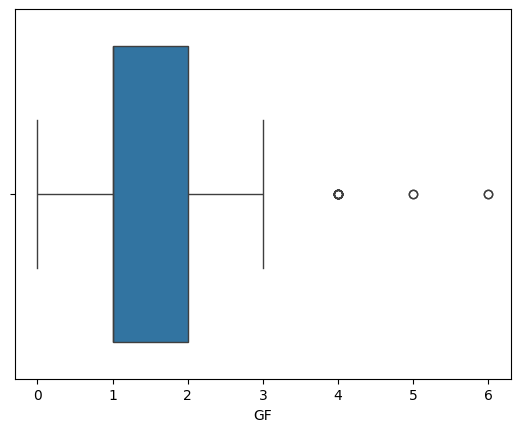

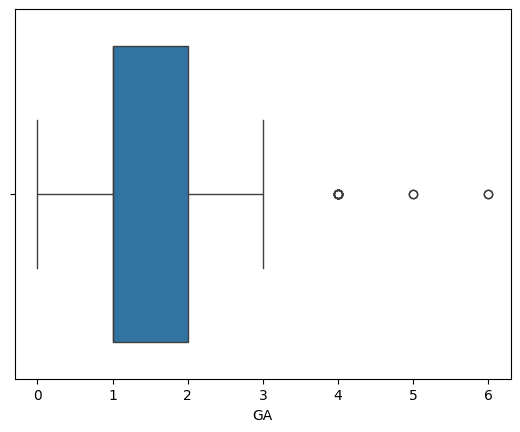

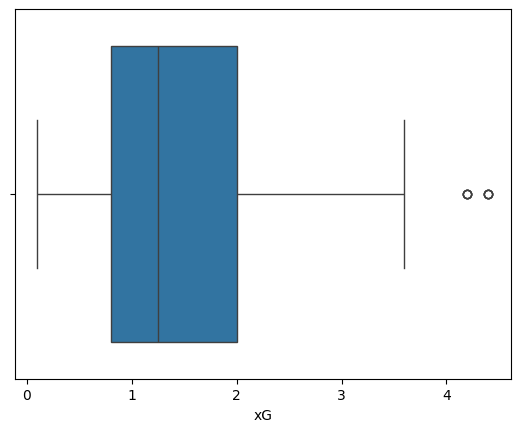

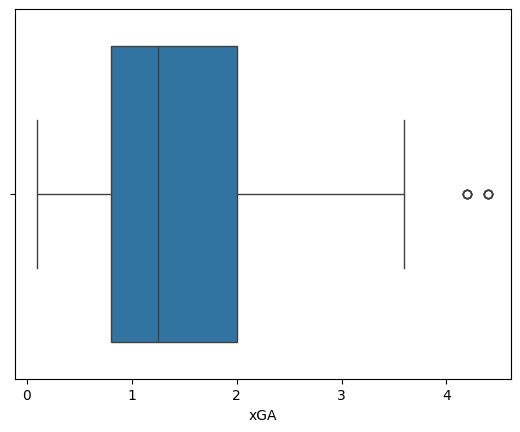

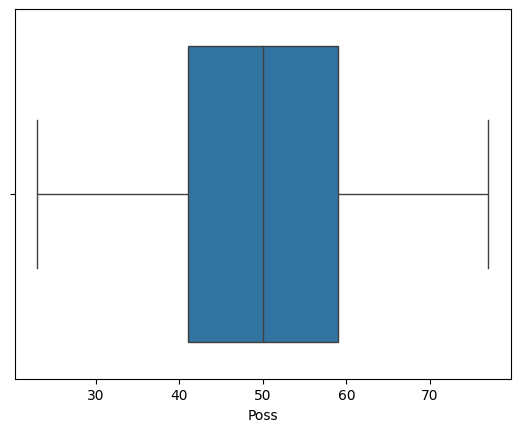

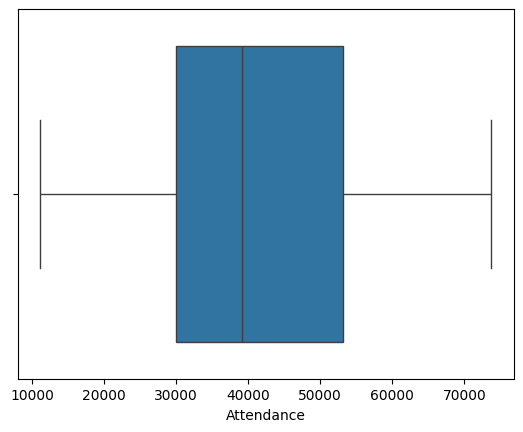

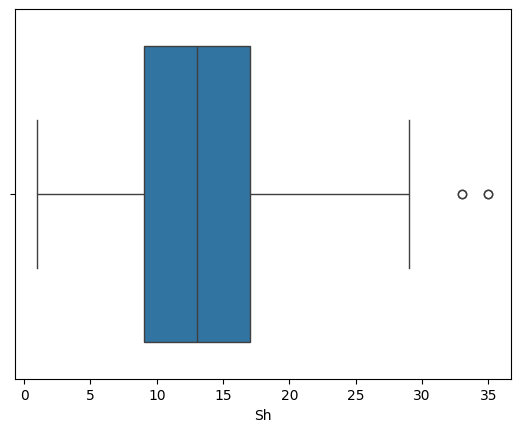

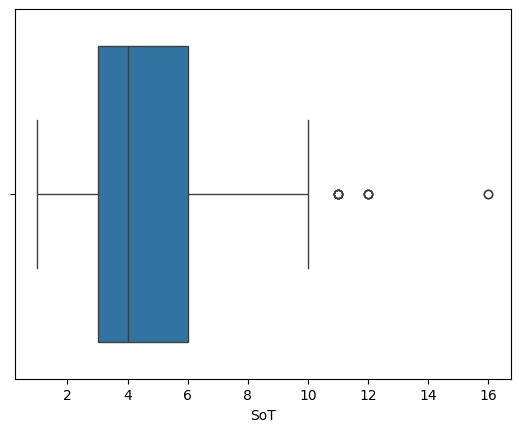

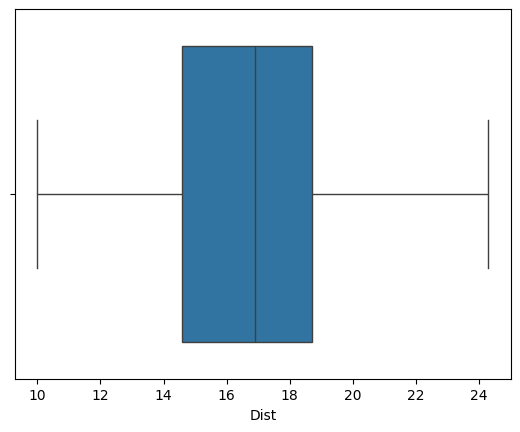

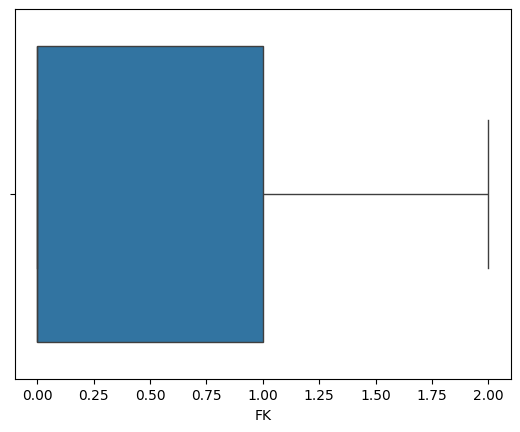

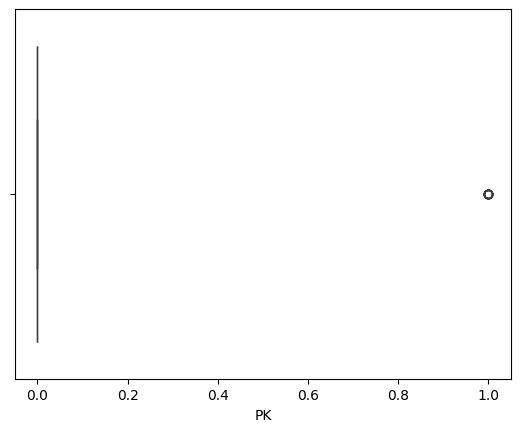

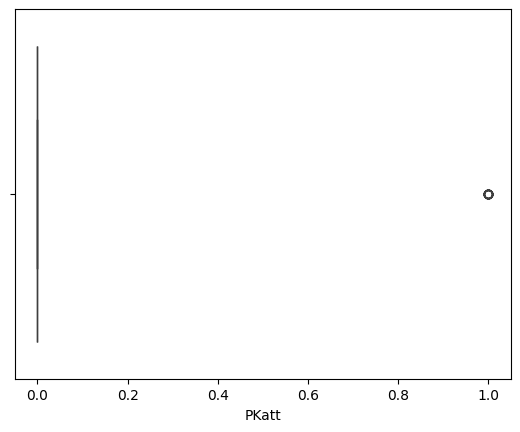

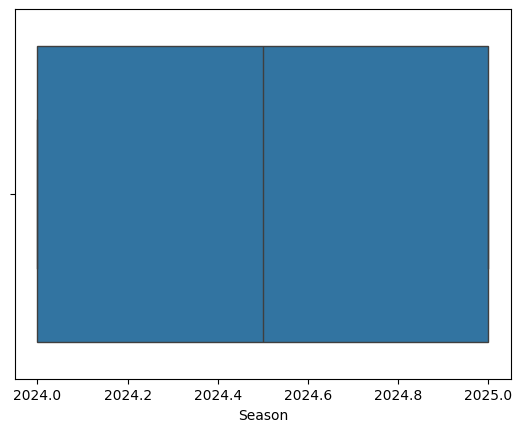

In [19]:
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()




In [20]:
def wisker(col):
    q1,q3=np.percentile(col,(25,75))
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [21]:
df.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Sh', 'SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [22]:
for i in ["GF","GA","xG","xGA","Poss","Sh","SoT","Dist","FK","PK","PKatt","Season"]:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])


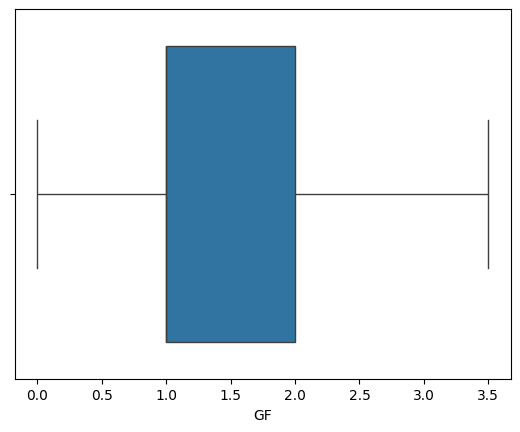

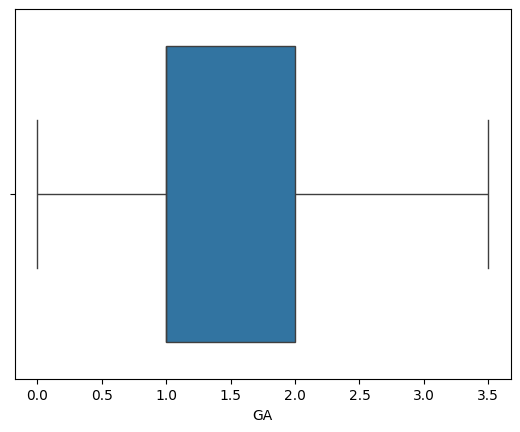

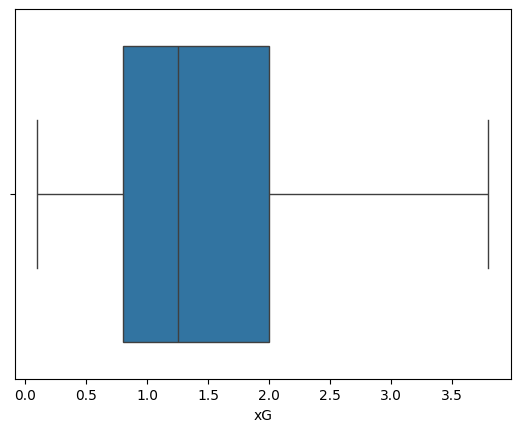

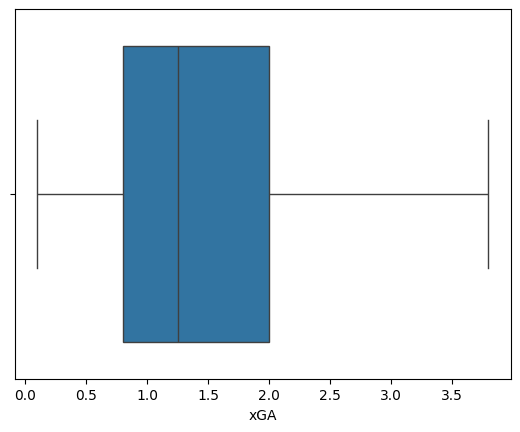

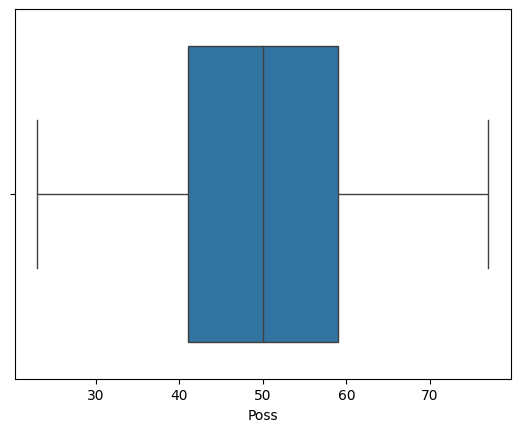

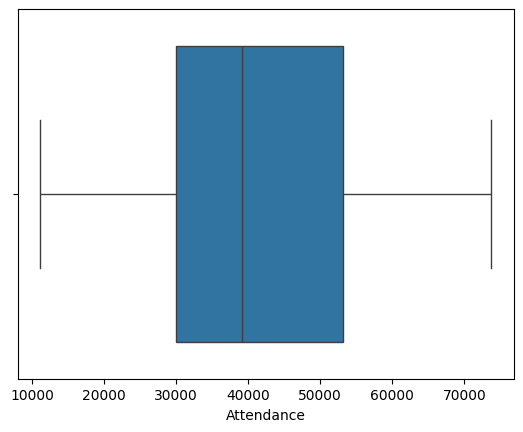

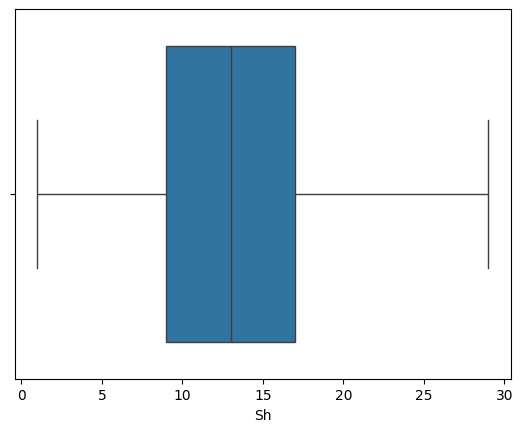

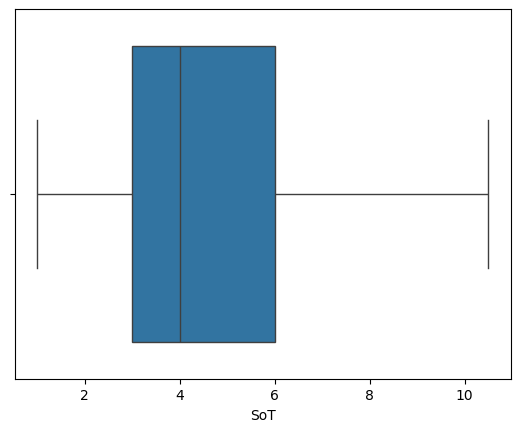

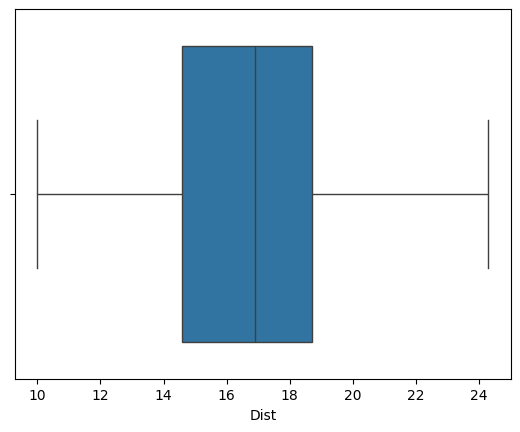

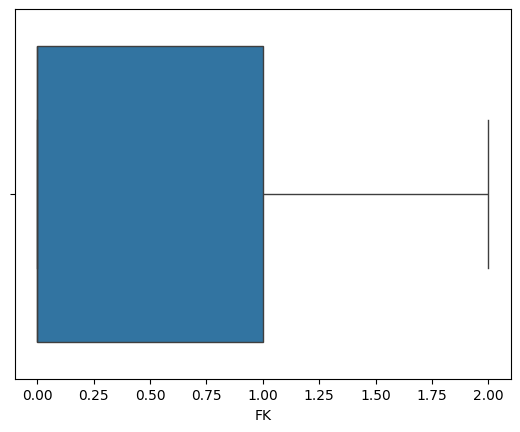

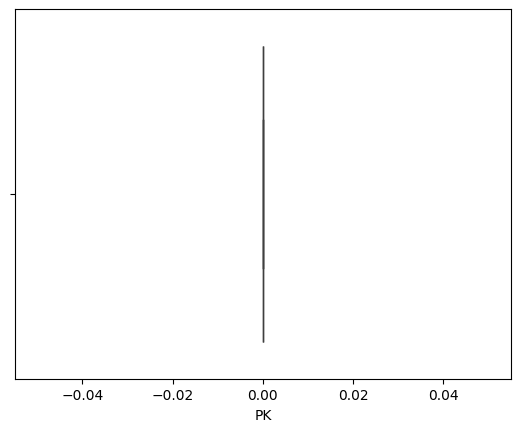

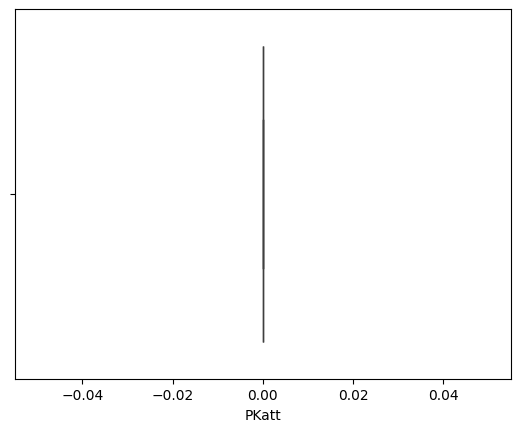

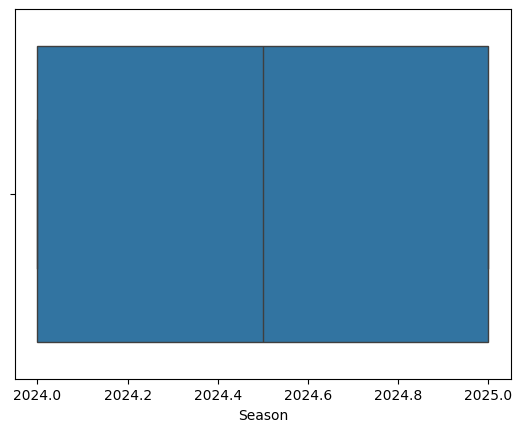

In [23]:
for i in df.select_dtypes(include="number" or "numeric").columns:
    sns.boxplot(data=df,x=i)
    plt.show()




In [24]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Referee,Match Report,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,2024-08-17,0,0,0,2,0,2,2.0,0.0,9,...,18,0,18.0,5.0,14.8,0.0,0.0,0.0,2025.0,11
1,2024-08-25,5,0,1,3,1,2,2.0,0.0,3,...,17,0,19.0,8.0,13.6,1.0,0.0,0.0,2025.0,11
2,2024-09-01,4,0,2,3,0,2,3.0,0.0,13,...,1,0,11.0,3.0,13.4,0.0,0.0,0.0,2025.0,11
3,2024-09-14,3,0,3,2,1,1,0.0,1.0,15,...,11,0,14.0,5.0,14.9,0.0,0.0,0.0,2025.0,11
5,2024-09-21,3,0,4,2,1,2,3.0,0.0,2,...,19,0,19.0,10.5,16.6,0.0,0.0,0.0,2025.0,11


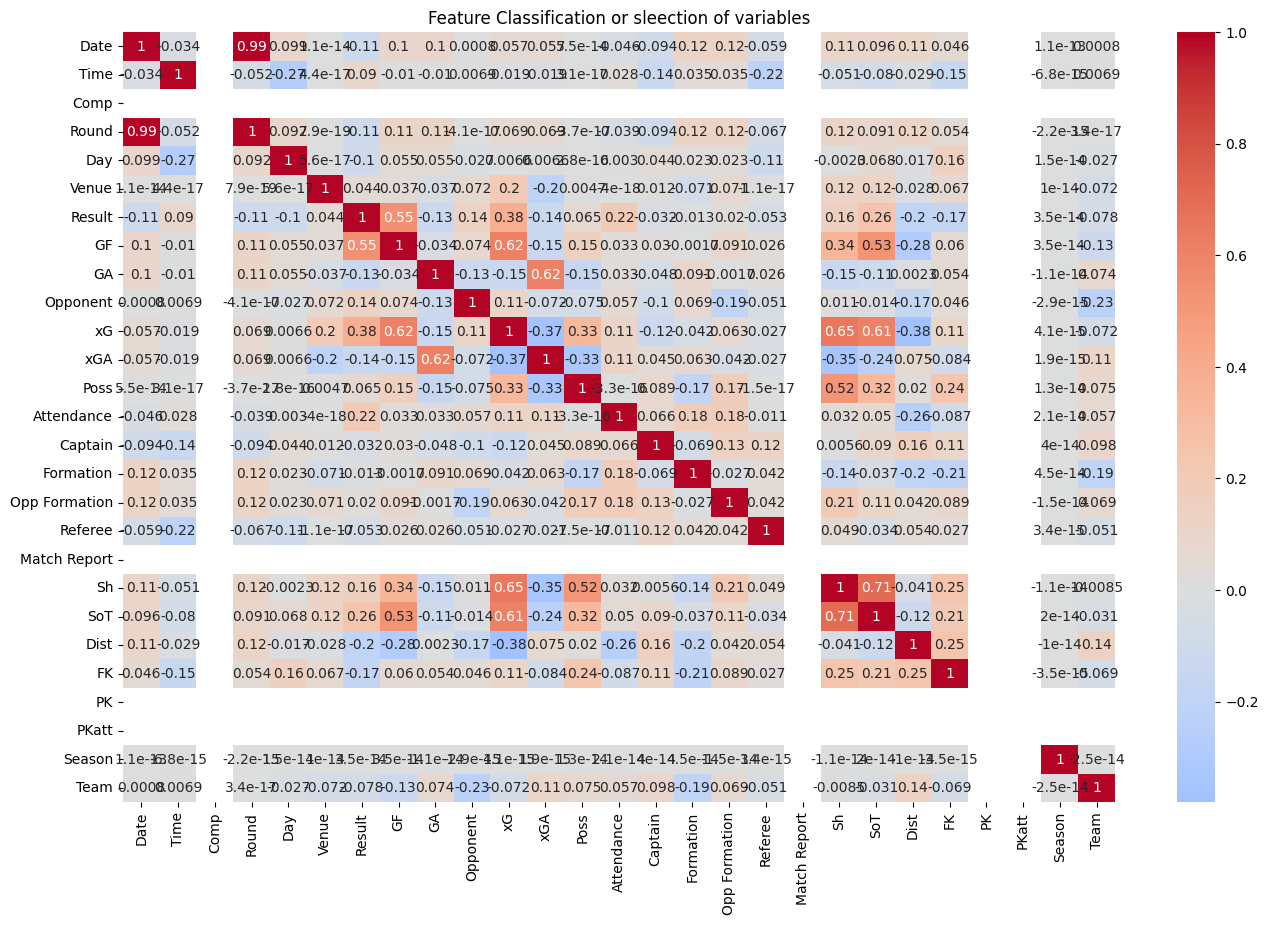

Unique features with Correlation Above 0.5:{'GA', 'xGA', 'Sh', 'Round', 'Result', 'Date', 'xG', 'Poss', 'SoT', 'GF'}


In [25]:
#when looking for correlation for the above
corr_matrix=df.corr()

##plot the heatmap
plt.rcParams["figure.figsize"]=[16,10]
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",center=0)
plt.title("Feature Classification or sleection of variables")
plt.show()


#setting threshold is one of the most important things so thst your model willnot predict basically on one features or the highest feature 
#it wiill also be able to identify different features incase there is limited or a particular feature is not available
#it will be able to work on diffferent features to predict well 

threshold=0.5


## identify the pairs of features with correlation above tthe threshold
high_corr_feat=[(feature,other_feature)
               for feature in corr_matrix.columns
               for other_feature in corr_matrix.columns
               if feature != other_feature and abs(corr_matrix.loc[feature,other_feature]) > threshold]
high_corr_set=set([item for sublist in high_corr_feat for item in sublist])
print(f"Unique features with Correlation Above {threshold}:{high_corr_set}")



In [102]:
df2=df[["GF","Result","Round","xGA","Poss","SoT","Sh","GA","xG"]]
df2.head(10)


,GF,Result,Round,xGA,Poss,SoT,Sh,GA,xG
0,2.0,2,0,0.5,62.0,5.0,18.0,0.0,2.6
1,2.0,2,1,0.5,62.0,8.0,19.0,0.0,2.5
2,3.0,2,2,1.4,47.0,3.0,11.0,0.0,1.8
3,0.0,1,3,0.4,68.0,5.0,14.0,1.0,0.9
5,3.0,2,4,1.1,58.0,10.5,19.0,0.0,2.0
7,2.0,2,5,0.6,55.0,5.0,9.0,1.0,2.5
9,1.0,2,6,0.6,68.0,4.0,16.0,0.0,1.4
1,2.0,2,0,1.0,52.0,5.0,11.0,0.0,0.8
2,3.5,2,1,0.3,75.0,4.0,13.0,1.0,3.3
3,3.0,2,2,0.7,67.0,8.0,23.0,1.0,3.0


In [103]:
df2.columns

Index(['GF', 'Result', 'Round', 'xGA', 'Poss', 'SoT', 'Sh', 'GA', 'xG'], dtype='object')

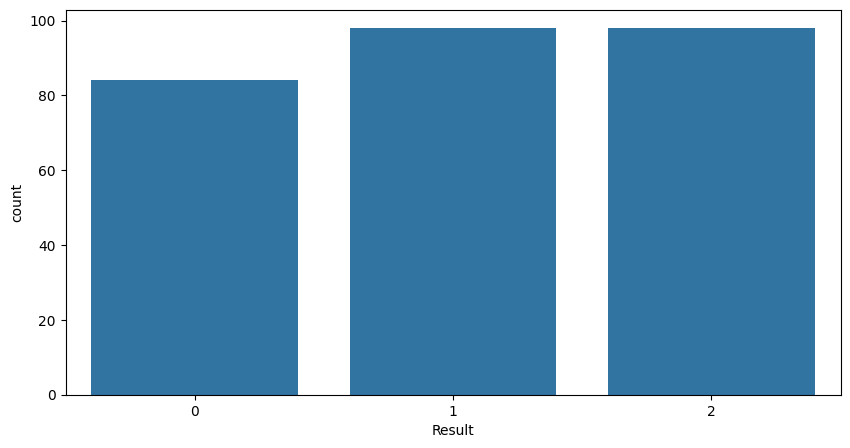

In [104]:
plt.figure(figsize=(10,5))
sns.countplot(x="Result",data=df)
plt.show()

In [105]:
from sklearn.utils import resample

df_0=df2[df2["Result"]==0]
df_1=df2[df2["Result"]==1]
df_2=df2[df2["Result"]==2]

df0_sam=resample(df_0,n_samples=100)
df1_sam=resample(df_1,n_samples=100)
df2_sam=resample(df_2,n_samples=100)

df2=pd.concat([df0_sam,df1_sam,df2_sam])
df2=df2.sample(frac=1,ignore_index=True)


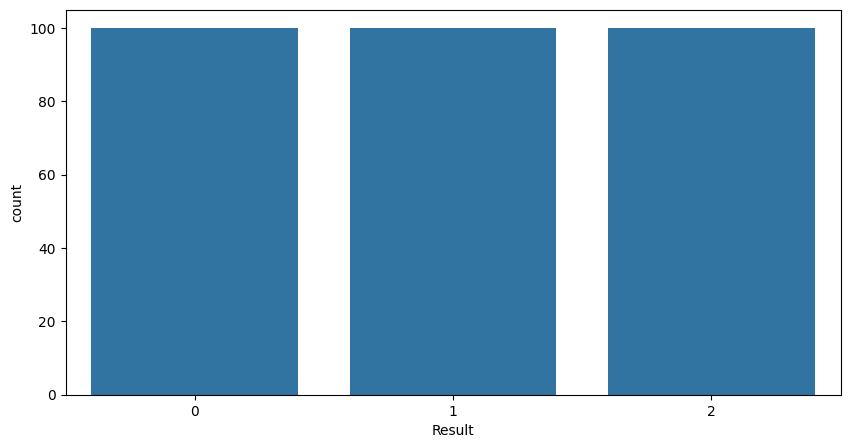

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x="Result",data=df2)
plt.show()

In [82]:
x=df2.drop(["Result"],axis=1)
y=df2[["Result"]]

In [83]:
x.head()

,GF,Round,xGA,Poss,SoT,Sh,GA,xG
0,0.0,4,2.2,53.0,7.0,15.0,3.0,0.9
1,0.0,0,0.8,48.0,3.0,10.0,2.0,1.0
2,3.0,5,0.6,40.0,6.0,14.0,1.0,1.3
3,0.0,6,0.6,53.0,1.0,11.0,0.0,0.5
4,2.0,4,1.0,30.0,2.0,3.0,2.0,1.4


In [84]:
y.head()

,Result
0,1
1,1
2,2
3,0
4,0


In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [86]:
xtrain.head()

,GF,Round,xGA,Poss,SoT,Sh,GA,xG
158,1.0,0,0.4,55.0,5.0,14.0,0.0,2.4
150,3.0,6,1.3,41.0,4.0,11.0,2.0,1.8
102,3.0,4,0.9,47.0,5.0,12.0,0.0,2.2
163,1.0,6,0.6,68.0,4.0,16.0,0.0,1.4
112,1.0,3,1.5,49.0,5.0,12.0,2.0,1.2


In [87]:
xtrain.columns


Index(['GF', 'Round', 'xGA', 'Poss', 'SoT', 'Sh', 'GA', 'xG'], dtype='object')

In [88]:
xtrain.shape

(240, 8)

In [89]:
xtrain.dtypes

GF       float64
Round      int64
xGA      float64
Poss     float64
SoT      float64
Sh       float64
GA       float64
xG       float64
dtype: object

In [90]:
xtest.head()

,GF,Round,xGA,Poss,SoT,Sh,GA,xG
189,3.5,6,1.0,44.0,10.5,18.0,3.0,3.8
123,2.0,5,3.8,59.0,5.0,15.0,3.5,1.1
185,3.0,4,0.8,48.0,9.0,23.0,1.0,3.5
213,3.0,3,0.9,72.0,7.0,17.0,2.0,2.1
106,2.0,4,2.1,23.0,3.0,5.0,2.0,0.7


In [91]:

from sklearn.pipeline import Pipeline
log=Pipeline([("Scaler",StandardScaler()),("Regression",LogisticRegression())])
des=Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeClassifier())])
Forest=Pipeline([("Scaler",StandardScaler()),("Regression",RandomForestClassifier())])
 

In [92]:
log.fit(xtrain,ytrain)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LogisticRegression())])

In [93]:
pred=log.predict(xtest)
pred

array([2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2,
       1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0])

In [94]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



<Axes: >

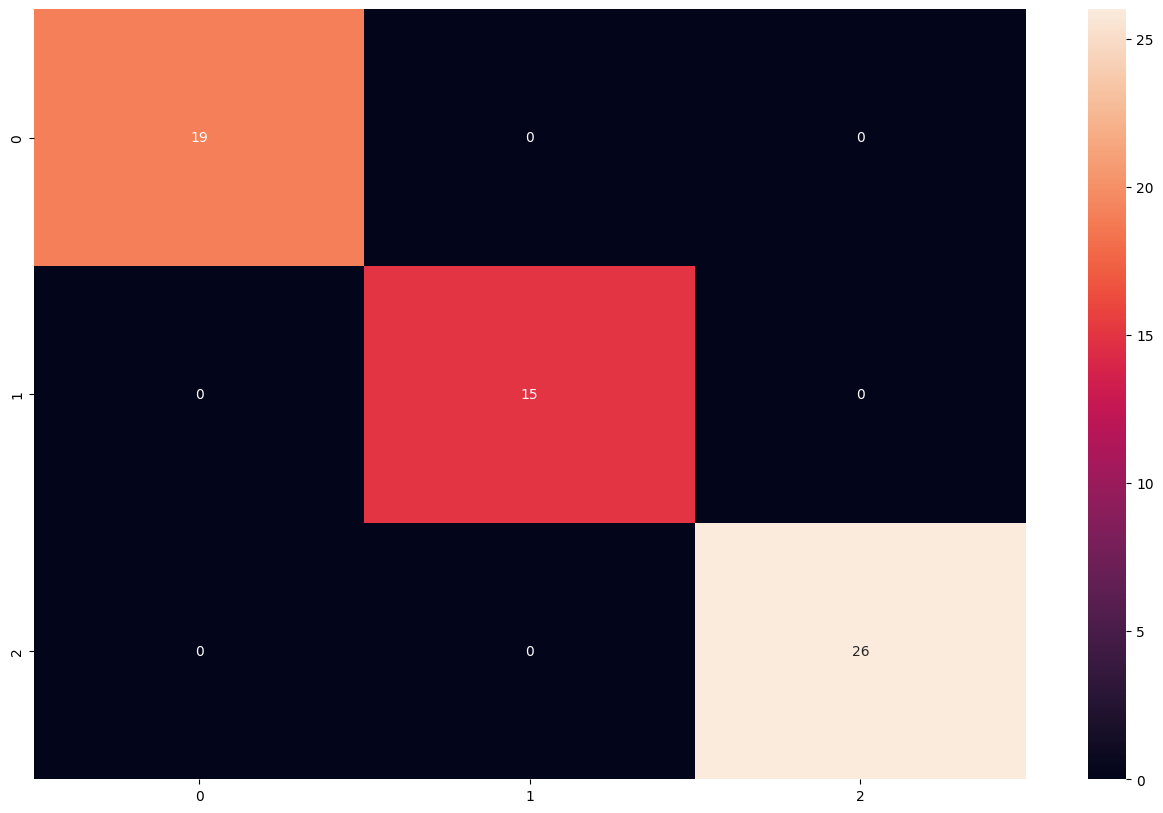

In [95]:
cm=confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,fmt="0.9g")

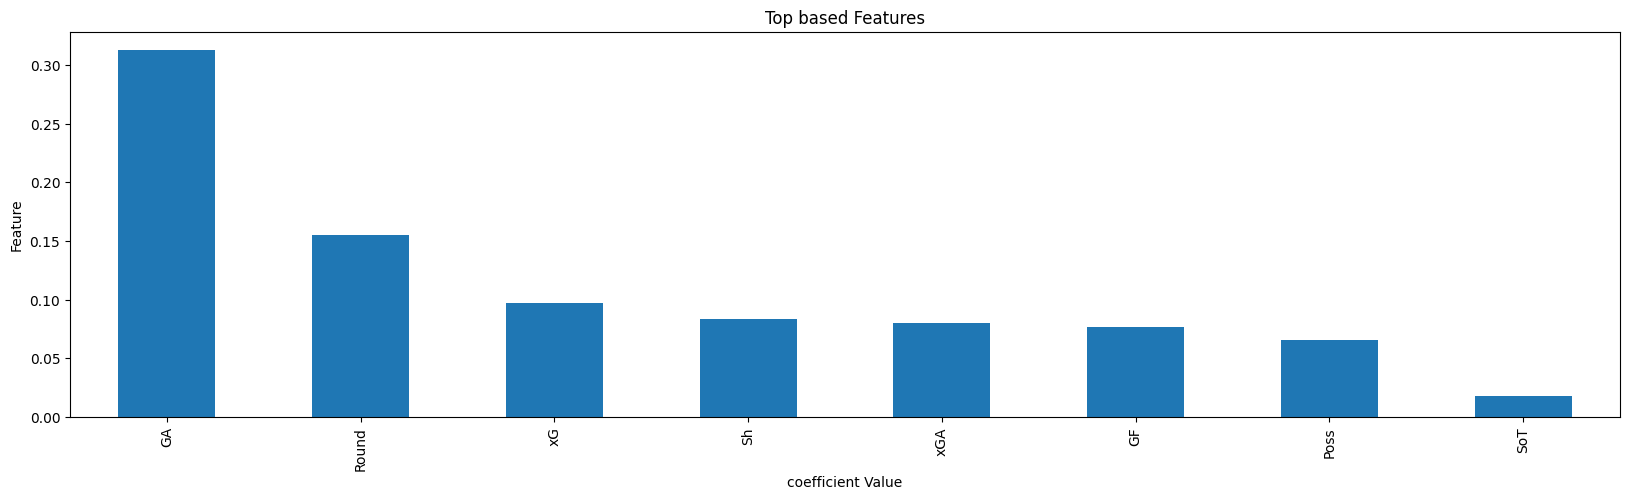

In [96]:
decision_model_per=log.named_steps["Regression"]

coefficents=decision_model_per.coef_[0]
feature_importances=pd.Series(coefficents,index=xtrain.columns)
top_features=feature_importances.abs().nlargest(12)
top_features.plot(kind="bar",figsize=(20,5))
plt.xlabel("coefficient Value")
plt.ylabel("Feature")
plt.title("Top based Features")
plt.show()

In [97]:
import pickle

with open('mymodel.pkl', 'wb') as file:
    pickle.dump(log, file)

In [98]:
#df3=df.copy()

In [99]:
#df3.to_csv("match_stats.csv",index=False)

In [100]:
# sharding- BLUMTACTIC
# HOW TO  CRYPTOFAN
# 2,12,4,10

In [101]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import pickle
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression


# # Load the dataset
# try:
#     df = pd.read_csv(r"C:\Users\DELL\Documents\python_class_it\Projects\Match Prediction\match_stats.csv")
# except FileNotFoundError:
#     st.error("The specified CSV file was not found. Please check the file path.")
#     st.stop()
 
# # DISPLAY FIELD FOR TEAM DATA IN THE SIDEBAR
# with st.sidebar:
#     team1 = st.selectbox("SELECT TEAM 1", df["Team"].sort_values().unique())
#     team2 = st.selectbox("SELECT TEAM 2", df["Team"].sort_values().unique())
#     show_data = st.button("RESULTING DATA")

# container = st.container()
# data1, data2 = container.columns(2)

# # Title and description
# st.title("FOOTBALL ANALYSIS")
# st.markdown("ALL PREMIER LEAGUE TEAMS VISUALIZATIONS CHARTS ")

# # Function to create visualizations for a selected team
# def create_visualizations(team_data, team_name):
#     team_data['Date'] = pd.to_datetime(team_data['Date'])  # Ensure 'Date' is in datetime format

#     # Create a line chart to show Goals For (GF) over time
#     fig_gf = px.line(team_data, x='Date', y='GF', title=f'Goals For Over Time for {team_name}')
#     st.plotly_chart(fig_gf)

#     # Create a line chart to show Goals Against (GA) over time
#     fig_ga = px.line(team_data, x='Date', y='GA', title=f'Goals Against Over Time for {team_name}')
#     st.plotly_chart(fig_ga)

#     # Create a scatter plot to show the relationship between Shots (Sh) and Goals For (GF)
#     fig_sh_gf = px.scatter(team_data, x='Sh', y='GF', title=f'Relationship between Shots and Goals For for {team_name}')
#     st.plotly_chart(fig_sh_gf)

#     # Create a scatter plot to show the relationship between Shots on Target (SoT) and Goals For (GF)
#     fig_sot_gf = px.scatter(team_data, x='SoT', y='GF', title=f'Relationship between Shots on Target and Goals For for {team_name}')
#     st.plotly_chart(fig_sot_gf)

#     # Create a pie chart to show the distribution of match results for the selected team
#     match_results = team_data['Result'].value_counts()
#     fig_results = px.pie(values=match_results.values, names=match_results.index, title=f'Distribution of Match Results for {team_name}')
#     st.plotly_chart(fig_results)
    
#     # Create a bar chart for total Goals For and Goals Against
#     fig_bar = px.bar(team_data, x='Date', y=['GF', 'GA'], title=f'Total Goals For and Against for {team_name}')
#     st.plotly_chart(fig_bar)

#     # Create a half pie chart to show the distribution of wins and losses for the selected team
#     fig_half_pie = px.pie(values=match_results.values, names=match_results.index, title=f'Wins and Losses for {team_name}', hole=0.5)
#     st.plotly_chart(fig_half_pie)

#     # Create a sunburst chart to show the distribution of match results by team Result
#     fig_sunburst = px.sunburst(team_data, path=['Team', 'Result'], values='GF', title=f'Sunburst Chart for {team_name}')
#     st.plotly_chart(fig_sunburst)

#     # Create a tree map to show the distribution of match results by team Result
#     fig_tree_map = px.treemap(team_data, path=['Team', 'Result'], values='GA', title=f'Tree Map for {team_name}')
#     st.plotly_chart(fig_tree_map)

# # Filter the data for both teams and create visualizations
# if show_data:
#     team1_data = df[df['Team'] == team1]
#     team2_data = df[df['Team'] == team2]

#     with data1:
#         st.subheader(f"Visualizations for {team1}")
#         create_visualizations(team1_data, team1)

#     with data2:
#         st.subheader(f"Visualizations for {team2}")
#         create_visualizations(team2_data, team2)

# # Load the model
# with open('mymodel.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Streamlit app
# #st.title('Match Result Prediction')

# # Create input fields for features
# st.header('Enter Match Details:')
# gf = st.number_input('Goals For (GF)', min_value=0.0, step=0.1)
# xga = st.number_input('Expected Goals Against (xGA)', min_value=0.0, step=0.1)
# poss = st.number_input('Possession (Poss)', min_value=0.0, max_value=100.0, step=0.1)
# sot = st.number_input('Shots on Target (SoT)', min_value=0, step=1)
# round = st.number_input('Round', min_value=1, step=1)
# sh = st.number_input('Shots (Sh)', min_value=0, step=1)
# ga = st.number_input('Goals Against (GA)', min_value=0, step=1)
# xg = st.number_input('Expected Goals (xG)', min_value=0.0, step=0.1)

# # Create a dataframe from the input
# input_data = pd.DataFrame({
#     'GF': [gf],
#     'xGA': [xga],
#     'Poss': [poss],
#     'SoT': [sot],
#     'Round': [round],
#     'Sh': [sh],
#     'GA': [ga],
#     'xG': [xg]
# })

# # Make prediction when the user clicks the button
# if st.button('Predict Result'):
#     prediction = model.predict(input_data)
#     probabilities = model.predict_proba(input_data)
    
#     result_map = {0: 'Loss', 1: 'Draw', 2: 'Win'}
#     predicted_result = result_map[prediction[0]]
    
#     st.subheader('Prediction:')
#     st.write(f'The predicted result is: {predicted_result}')
    
#     st.subheader('Prediction Probabilities:')
#     st.write(f'Loss: {probabilities[0][0]:.2f}')
#     st.write(f'Draw: {probabilities[0][1]:.2f}')
#     st.write(f'Win: {probabilities[0][2]:.2f}')


 
